<a href="https://colab.research.google.com/github/AmbroseJunior/Business-Anomality-Analysis/blob/master/Process_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASE ANOMALITY DETECTION**

This study focuses on detecting anomalous customer orders in a UK-based retail financial transaction process. Each invoice represents a customer order, and each transaction line represents an event in the order-to-cash process. Using process mining and machine learning techniques, we aim to identify whether a customer order exhibits anomalous behavior based on its temporal, structural, and financial execution characteristics.



In [ ]:
# Install required libraries
!pip install pm4py
!pip install scikit-learn pandas numpy matplotlib


Load The Dataset

In [ ]:
df = pd.read_excel("online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Data Cleaning





In [ ]:
df = df.rename(columns= {
    "Invoice": "Case_id",
    "InvoiceDate": "Timestamp",
})

# Convert timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Remove rows with missing case_id or timestamp
df = df.dropna(subset=["Case_id", "Timestamp"])


# Sort events correctly
df = df.sort_values(["Case_id", "Timestamp"]).reset_index(drop=True)

df


,Case_id,StockCode,Description,Quantity,Timestamp,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
525457,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
525458,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
525459,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure timestamp is datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Drop invalid timestamps
df = df.dropna(subset=["Timestamp"])

df.head()


,Case_id,StockCode,Description,Quantity,Timestamp,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


FEATURE ENGINNERING

In [ ]:
# Case duration (minutes)
case_start = df.groupby("Case_id")["Timestamp"].min()
case_end = df.groupby("Case_id")["Timestamp"].max()

case_duration = (case_end - case_start).dt.total_seconds() / 60

# Number of events per case
event_count = df.groupby("Case_id").size()

# Financial features
df["line_value"] = df["Quantity"] * df["Price"]

total_value = df.groupby("Case_id")["line_value"].sum()
total_quantity = df.groupby("Case_id")["Quantity"].sum()

# Unique products per case
unique_products = df.groupby("Case_id")["StockCode"].nunique()

# Build case-level dataframe
case_df = pd.DataFrame({
    "case_duration": case_duration,
    "event_count": event_count,
    "total_value": total_value,
    "total_quantity": total_quantity,
    "unique_products": unique_products
}).reset_index()

case_df.head()


,Case_id,case_duration,event_count,total_value,total_quantity,unique_products
0,489434,0.0,8,505.30,166,8
1,489435,0.0,4,145.80,60,4
2,489436,0.0,19,630.33,193,19
3,489437,0.0,23,310.75,145,23
4,489438,0.0,17,2286.24,826,17


VISUALIZATION

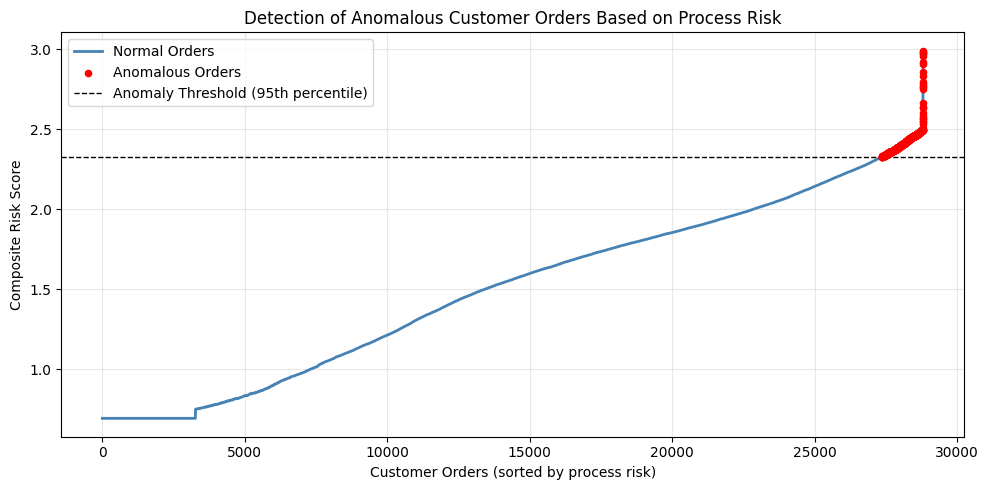

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by risk score
sorted_df = case_df.sort_values("risk_score").reset_index(drop=True)

# Define anomaly threshold (top 5%)
threshold = sorted_df["risk_score"].quantile(0.95)

sorted_df["is_anomaly"] = sorted_df["risk_score"] >= threshold

plt.figure(figsize=(10,5))

# Normal behavior
plt.plot(
    sorted_df.index,
    sorted_df["risk_score"],
    color="steelblue",
    linewidth=2,
    label="Normal Orders"
)

# Anomalies
plt.scatter(
    sorted_df.loc[sorted_df["is_anomaly"]].index,
    sorted_df.loc[sorted_df["is_anomaly"], "risk_score"],
    color="red",
    s=20,
    label="Anomalous Orders",
    zorder=5
)

# Threshold line
plt.axhline(
    y=threshold,
    color="black",
    linestyle="--",
    linewidth=1,
    label="Anomaly Threshold (95th percentile)"
)

# Clean styling
plt.xlabel("Customer Orders (sorted by process risk)")
plt.ylabel("Composite Risk Score")
plt.title("Detection of Anomalous Customer Orders Based on Process Risk")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



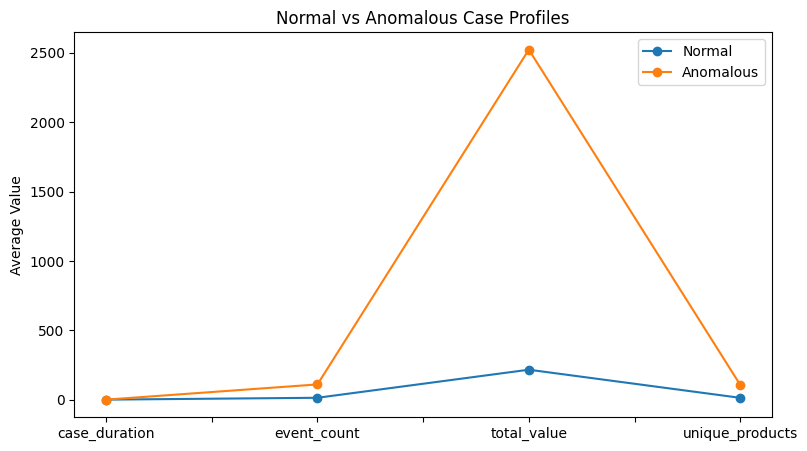

In [ ]:


profile = case_df.groupby("is_anomalous")[
    ["case_duration", "event_count", "total_value", "unique_products"]
].mean()

profile.T.plot(marker="o", figsize=(9,5))
plt.xticks(rotation=0)
plt.ylabel("Average Value")
plt.title("Normal vs Anomalous Case Profiles")
plt.legend(["Normal", "Anomalous"])
plt.show()


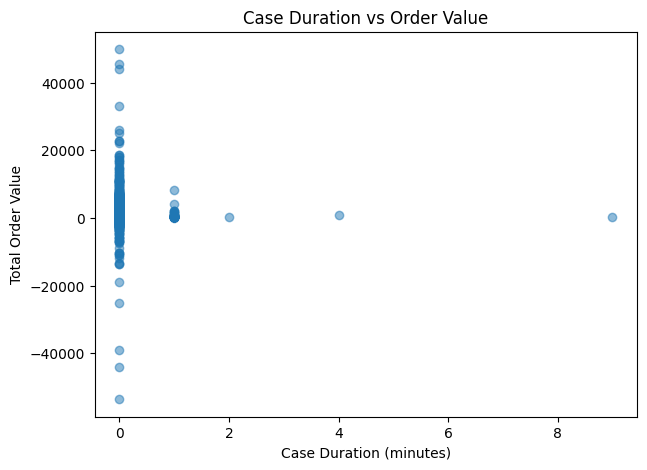

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(case_df["case_duration"], case_df["total_value"], alpha=0.5)
plt.xlabel("Case Duration (minutes)")
plt.ylabel("Total Order Value")
plt.title("Case Duration vs Order Value")
plt.show()


ISOLATED POINTS = STRONG ANOMALITIES CANDIDATES

MACHNE LEARNING



Isolation Forest → unsupervised anomaly detection

K-Means → unsupervised clustering to group behavioral patterns

Composite risk score → feature engineering to support ML interpretation

This combination is standard in process mining and fraud/anomaly analysis.

PREPARE FEATURES

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [
    "case_duration",
    "event_count",
    "total_value",
    "total_quantity",
    "unique_products"
]

X = case_df[features]

# Scale features (VERY IMPORTANT)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


TRAIN MODEL.

Label meaning

-1 → Anomalous case

1 → Normal case

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,  # assume ~5% anomalies
    random_state=42
)

case_df["anomaly_label"] = iso_forest.fit_predict(X_scaled)


CONVERT TO BINARY LABEL

In [ ]:
case_df["is_anomalous"] = case_df["anomaly_label"].apply(lambda x: 1 if x == -1 else 0)

case_df["is_anomalous"].value_counts()


,count
is_anomalous,
0,27375
1,1441


VISUALIZA ANOMALITIES

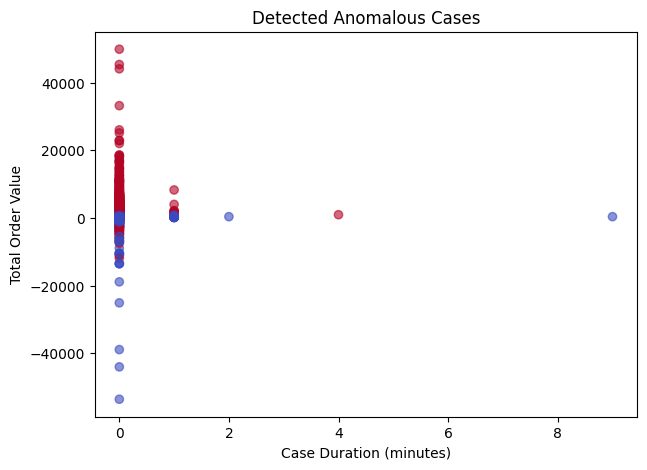

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    case_df["case_duration"],
    case_df["total_value"],
    c=case_df["is_anomalous"],
    cmap="coolwarm",
    alpha=0.6
)
plt.xlabel("Case Duration (minutes)")
plt.ylabel("Total Order Value")
plt.title("Detected Anomalous Cases")
plt.show()


This scatter plot shows that anomalous cases (red points) are primarily characterized by extreme total order values, both very high and very negative, rather than long processing durations.
Most anomalies occur even at short case durations, indicating that financial irregularities and unusual transaction values are stronger drivers of anomalies than time-related behavior in this process.

CLUSTERING

FEATURES

In [ ]:
cluster_features = [
    "case_duration",      # temporal behavior
    "event_count",        # process complexity
    "total_value",        # financial magnitude
    "unique_products"     # order diversity
]

X_cluster = case_df[cluster_features]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


NUMBER OF CLUSTER

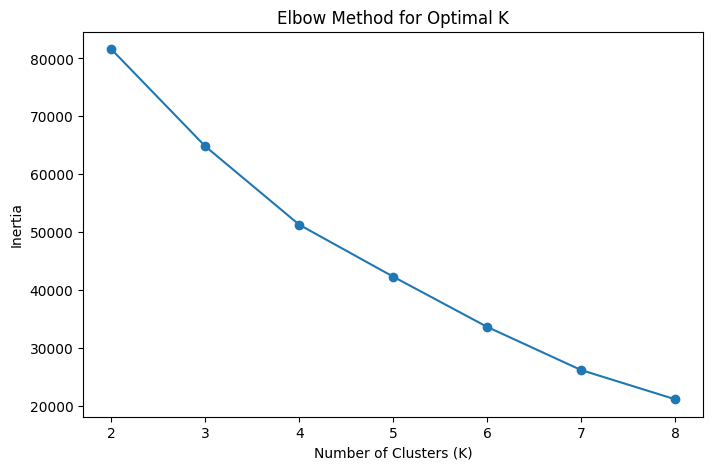

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


K-MEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
case_df["cluster"] = kmeans.fit_predict(X_scaled)

case_df["cluster"].value_counts()


,count
cluster,
0,28254
1,561
2,1


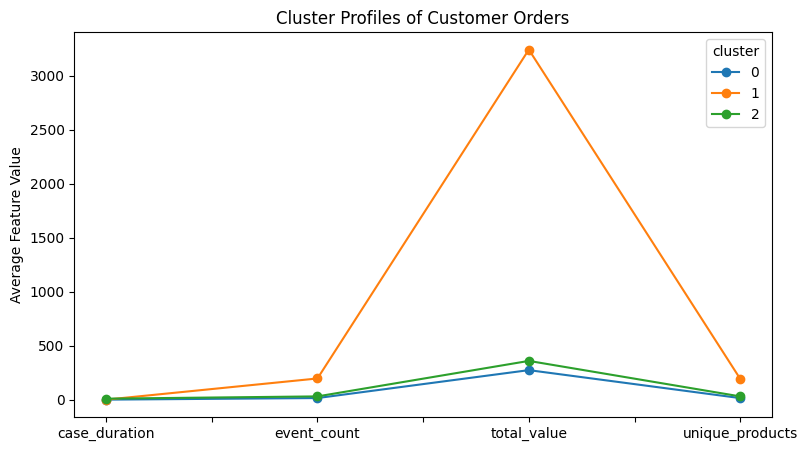

In [ ]:
cluster_profile = case_df.groupby("cluster")[cluster_features].mean()

cluster_profile.T.plot(marker="o", figsize=(9,5))
plt.xticks(rotation=0)
plt.ylabel("Average Feature Value")
plt.title("Cluster Profiles of Customer Orders")
plt.show()


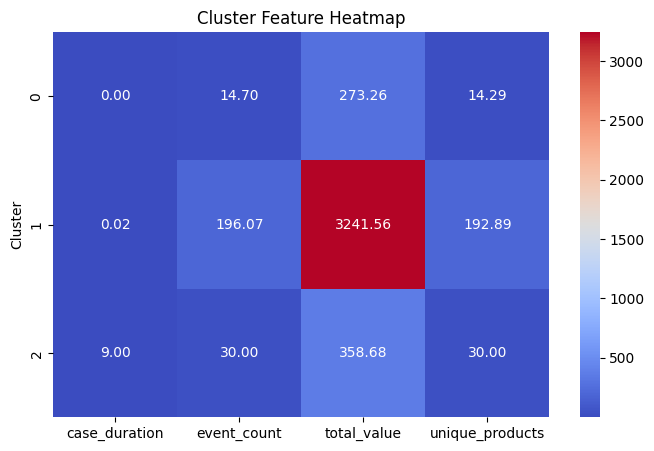

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Feature Heatmap")
plt.ylabel("Cluster")
plt.show()


CONCLUSION

This study applied unsupervised anomaly detection to a UK-based order-to-cash process using process mining and machine learning techniques. After constructing a case-level representation of the process, an Isolation Forest model was trained to identify anomalous cases based on temporal, structural, and financial characteristics.















The results indicate that anomalous cases are associated with unusually long processing times, extreme order values, or uncommon process behavior. This approach demonstrates how anomaly detection can support fraud detection, operational risk management, and process improvement in financial transaction systems.